In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
path='/Users/robin/Downloads/android_bids_us.csv'

In [3]:
df=pd.read_csv(path)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3148828 entries, 0 to 3148827
Data columns (total 12 columns):
bidid            object
utc_time         int64
app_id           object
user_state       object
user_isp         object
device_maker     object
device_model     object
device_osv       object
device_height    int64
device_width     int64
marketplace      object
click            int64
dtypes: int64(4), object(8)
memory usage: 288.3+ MB


In [5]:
df.duplicated().sum() # displays duplicate records

0

In [6]:
df.columns # displays column names

Index(['bidid', 'utc_time', 'app_id', 'user_state', 'user_isp', 'device_maker',
       'device_model', 'device_osv', 'device_height', 'device_width',
       'marketplace', 'click'],
      dtype='object')

In [7]:
df.isnull().sum() 
# Before to start we need with our missing value

bidid                 0
utc_time              0
app_id                0
user_state            0
user_isp             39
device_maker     964004
device_model     963858
device_osv            0
device_height         0
device_width          0
marketplace           0
click                 0
dtype: int64

In [8]:
#if we drop our missing line of device maker and model we'll be abble to keep arrund 70% of our data
#I consider it 70% as statisticly significative to built our prediction model
percent_missing = df.isnull().sum() * 100 / len(df)
missing_values = pd.DataFrame({'NaNs percentage': percent_missing})
missing_values.sort_values(by ='NaNs percentage' , ascending=False)

,NaNs percentage
device_maker,30.614692
device_model,30.610056
user_isp,0.001239
bidid,0.000000
utc_time,0.000000
app_id,0.000000
user_state,0.000000
device_osv,0.000000
device_height,0.000000
device_width,0.000000


In [9]:
df.dropna(inplace=True)

In [10]:
df.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click
46,c11b24e7-8471-41f5-82af-24be5d1a3c1f,1537855513297,com.critical.strike.shoot.fire.fssc,CA,AT&T Wireless,Samsung,SM-G920AZ,7.0,1080,1920,chartboost,0
47,ca89d32e-85d8-4cd8-a681-0a5902d0cf55,1537855549353,com.cardgame.solitaire,AL,AT&T Wireless,Samsung,SM-G955U,7.0,1280,720,chartboost,0
48,5f6268a1-58d8-4a3d-b06b-4293484ee6c8,1537855629973,com.xiart.fb.towersx,CA,Google Fiber,Samsung,SM-G930V,8.0.0,1080,1920,chartboost,1
49,d89c308a-a29c-4d8c-a61b-4f2426877f51,1537855674264,com.thumbspire.weedfirm2,NC,T-Mobile USA,LG,MS210,7.0,1280,720,chartboost,0
50,55ad5fc9-467e-4bcf-84d1-9deaf70158b1,1537855686541,com.zentertain.classicvegasslots,GA,Sprint PCS,LG,LS777,7.0,720,1280,chartboost,0


In [11]:
#we create a feature day_of_week and month and hours
df['day_of_week']=pd.to_datetime(df['utc_time'], unit='ms').dt.strftime('%w')
df['month']=pd.to_datetime(df['utc_time'], unit='ms').dt.strftime('%-m')
df['hours']=pd.to_datetime(df['utc_time'], unit='ms').dt.strftime('%H')
df.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,day_of_week,month,hours
46,c11b24e7-8471-41f5-82af-24be5d1a3c1f,1537855513297,com.critical.strike.shoot.fire.fssc,CA,AT&T Wireless,Samsung,SM-G920AZ,7.0,1080,1920,chartboost,0,2,9,06
47,ca89d32e-85d8-4cd8-a681-0a5902d0cf55,1537855549353,com.cardgame.solitaire,AL,AT&T Wireless,Samsung,SM-G955U,7.0,1280,720,chartboost,0,2,9,06
48,5f6268a1-58d8-4a3d-b06b-4293484ee6c8,1537855629973,com.xiart.fb.towersx,CA,Google Fiber,Samsung,SM-G930V,8.0.0,1080,1920,chartboost,1,2,9,06
49,d89c308a-a29c-4d8c-a61b-4f2426877f51,1537855674264,com.thumbspire.weedfirm2,NC,T-Mobile USA,LG,MS210,7.0,1280,720,chartboost,0,2,9,06
50,55ad5fc9-467e-4bcf-84d1-9deaf70158b1,1537855686541,com.zentertain.classicvegasslots,GA,Sprint PCS,LG,LS777,7.0,720,1280,chartboost,0,2,9,06


In [12]:
df.select_dtypes(include = ['object']).columns # Displays categorical variables which are detected by python 

Index(['bidid', 'app_id', 'user_state', 'user_isp', 'device_maker',
       'device_model', 'device_osv', 'marketplace', 'day_of_week', 'month',
       'hours'],
      dtype='object')

In [13]:
# Assigning columns as numerical variables
numeric_cols = ['utc_time', 'device_height', 'device_width']
Categorical_cols = [ 'bidid', 'app_id', 'user_state', 'user_isp','device_maker','device_model','device_osv','marketplace', 'hours','day_of_week','month','click' ]

In [14]:
df[numeric_cols].describe()

,utc_time,device_height,device_width
count,2.184775e+06,2.184775e+06,2.184775e+06
mean,1.539452e+12,1.118599e+03,1.183029e+03
std,1.567003e+09,5.066286e+02,4.550477e+02
min,1.536746e+12,2.500000e+01,1.400000e+01
25%,1.538282e+12,7.200000e+02,7.680000e+02
50%,1.539188e+12,1.080000e+03,1.280000e+03
75%,1.540671e+12,1.280000e+03,1.280000e+03
max,1.542630e+12,3.120000e+03,3.120000e+03


In [15]:
df[Categorical_cols].describe(include = ['O'])

,bidid,app_id,user_state,user_isp,device_maker,device_model,device_osv,marketplace,hours,day_of_week,month
count,2184775,2184775,2184775,2184775,2184775,2184775,2184775,2184775,2184775,2184775,2184775
unique,2028521,13375,51,2540,265,2342,16,1,24,7,3
top,8aabef26-6f1b-4d9b-b2e0-b64a11f9f62d,com.banananadco.blackjack,TX,T-Mobile USA,Samsung,LM-X210(G),7.0,chartboost,23,6,10
freq,2,40111,297412,545087,863518,110590,766516,2184775,169777,408496,1145089


In [16]:
print(pd.crosstab(df['user_state'], df['click']).sort_values(1,0, ascending = False).head(10))
print(' ')
print(pd.crosstab(df['month'], df['click']).sort_values(1,0, ascending = False).head(10))
print('')
print(pd.crosstab(df['hours'], df['click']).sort_values(1,0, ascending = False).head(10))
print('')
print(pd.crosstab(df['day_of_week'], df['click']).sort_values(1,0, ascending = False).head(10))
print(' ')
print(pd.crosstab(df['device_osv'], df['click']).sort_values(1,0, ascending = False).head(10))
print(' ')
print(pd.crosstab(df['device_maker'], df['click']).sort_values(1,0, ascending = False).head(10))

click            0      1
user_state               
TX          276786  20626
CA          256478  20478
FL          176282  13754
IL          129108   9666
NY          114541   9024
GA           85978   6652
MI           78851   6354
NC           80995   6240
OH           64129   5019
PA           49374   3875
 
click        0      1
month                
10     1061707  83382
9       562065  41958
11      404073  31590

click       0      1
hours               
23     157439  12338
22     142180  10842
21     137639  10477
02     147915  10421
20     127762   9644
19     122261   9410
16     106937   8552
15     104406   8548
17     107769   8409
04     112620   8380

click             0      1
day_of_week               
6            378759  29737
0            358019  27876
4            319115  24053
1            278697  21660
3            264282  20418
2            247187  19520
5            181786  13666
 
click                             0      1
device_osv                        

In [17]:
print(pd.crosstab(index=df['user_state'],columns='count').sort_values(['count'], ascending=False).head(10))
print(' ')
print(pd.crosstab(index=df['day_of_week'],columns='count').sort_values(['count'], ascending=False).head(10))
print(' ')
print(pd.crosstab(index=df['device_osv'],columns='count').sort_values(['count'], ascending=False).head(10))
print(' ')
print(pd.crosstab(df['device_maker'], df['click']).sort_values(1,0, ascending = False).head(10))


col_0        count
user_state        
TX          297412
CA          276956
FL          190036
IL          138774
NY          123565
GA           92630
NC           87235
MI           85205
OH           69148
PA           53249
 
col_0         count
day_of_week        
6            408496
0            385895
4            343168
1            300357
3            284700
2            266707
5            195452
 
col_0        count
device_osv        
7.0         766516
7.1.1       433010
8.0.0       366251
6.0.1       366180
7.1.2       155856
6.0          40690
8.1.0        38759
9            17452
7.1             33
8.0             10
 
click                   0      1
device_maker                    
LG                 600521  56724
Samsung            812743  50775
Motorola           205711  18915
ZTE                176987   9613
ALCATEL             51178   3871
Google              22259   2270
ALCATEL ONE TOUCH   15683   1743
HTC                 25755   1740
T-Mobile            19879   

In [18]:
df.head()

,bidid,utc_time,app_id,user_state,user_isp,device_maker,device_model,device_osv,device_height,device_width,marketplace,click,day_of_week,month,hours
46,c11b24e7-8471-41f5-82af-24be5d1a3c1f,1537855513297,com.critical.strike.shoot.fire.fssc,CA,AT&T Wireless,Samsung,SM-G920AZ,7.0,1080,1920,chartboost,0,2,9,06
47,ca89d32e-85d8-4cd8-a681-0a5902d0cf55,1537855549353,com.cardgame.solitaire,AL,AT&T Wireless,Samsung,SM-G955U,7.0,1280,720,chartboost,0,2,9,06
48,5f6268a1-58d8-4a3d-b06b-4293484ee6c8,1537855629973,com.xiart.fb.towersx,CA,Google Fiber,Samsung,SM-G930V,8.0.0,1080,1920,chartboost,1,2,9,06
49,d89c308a-a29c-4d8c-a61b-4f2426877f51,1537855674264,com.thumbspire.weedfirm2,NC,T-Mobile USA,LG,MS210,7.0,1280,720,chartboost,0,2,9,06
50,55ad5fc9-467e-4bcf-84d1-9deaf70158b1,1537855686541,com.zentertain.classicvegasslots,GA,Sprint PCS,LG,LS777,7.0,720,1280,chartboost,0,2,9,06


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2184775 entries, 46 to 3148827
Data columns (total 15 columns):
bidid            object
utc_time         int64
app_id           object
user_state       object
user_isp         object
device_maker     object
device_model     object
device_osv       object
device_height    int64
device_width     int64
marketplace      object
click            int64
day_of_week      object
month            object
hours            object
dtypes: int64(4), object(11)
memory usage: 266.7+ MB


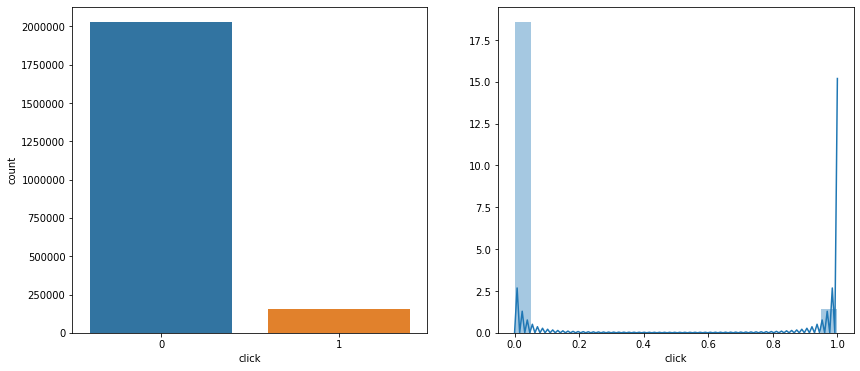

In [20]:
# Visualizing target variable Clicked on Ad
plt.figure(figsize = (14, 6)) 
plt.subplot(1,2,1)            
sns.countplot(x = 'click', data = df)
plt.subplot(1,2,2)
sns.distplot(df["click"], bins = 20)
plt.show()

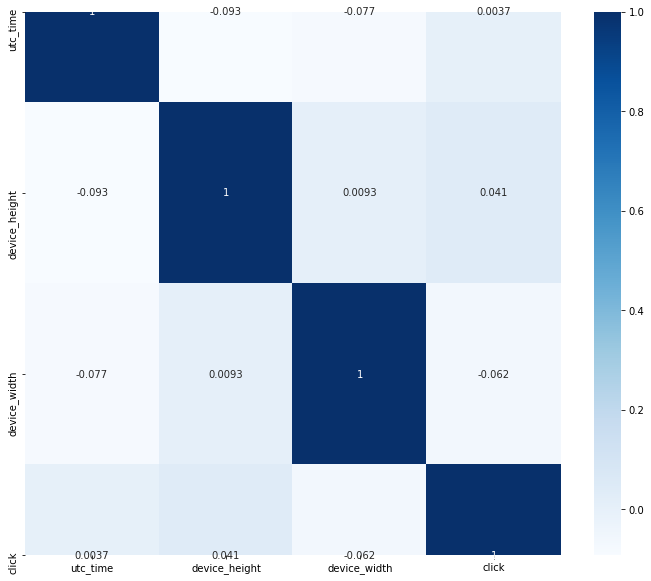

In [21]:
fig = plt.figure(figsize = (12,10))
sns.heatmap(df.corr(), cmap='Blues', annot = True) # Degree of relationship i.e correlation using heatmap

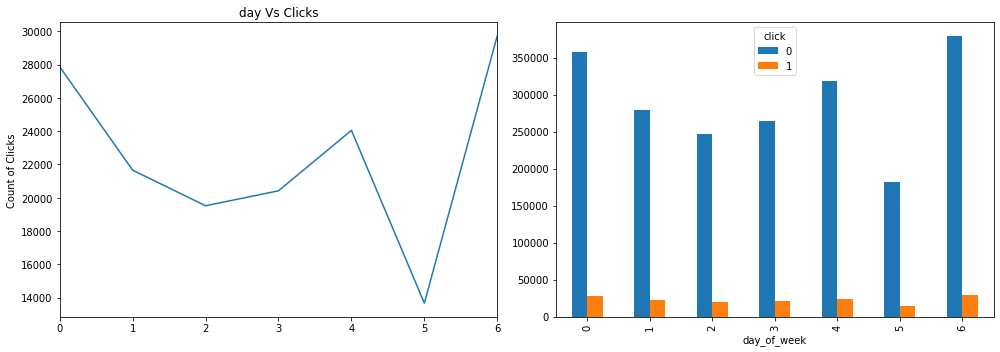

In [22]:
f,ax=plt.subplots(1,2,figsize=(14,5))
df['day_of_week'][df['click']==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_title('day Vs Clicks')
ax[0].set_ylabel('Count of Clicks')
pd.crosstab(df["click"], df["day_of_week"]).T.plot(kind = 'bar',ax=ax[1])
plt.tight_layout()
plt.show()

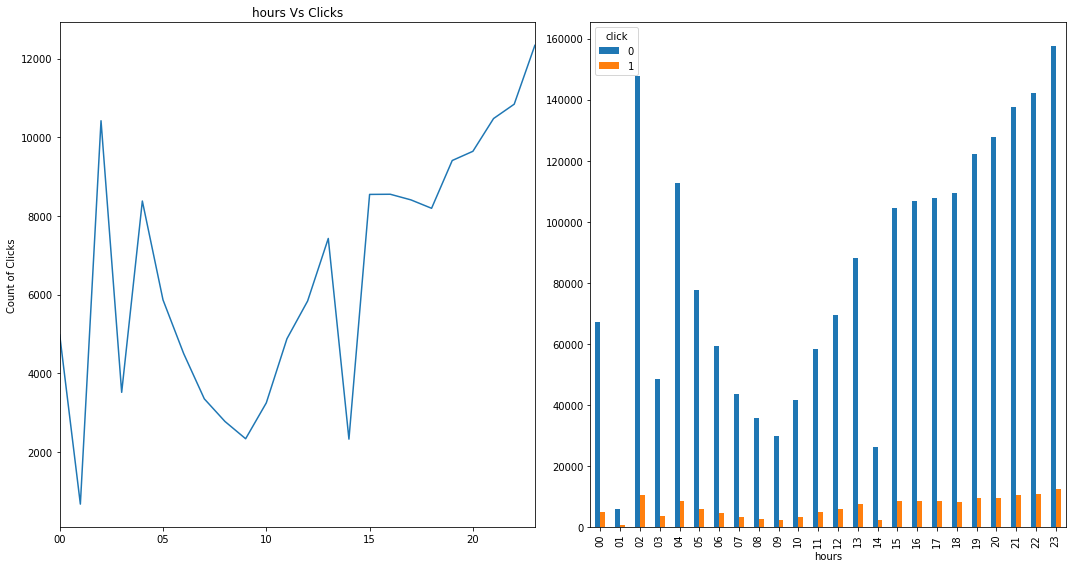

In [23]:
f,ax=plt.subplots(1,2,figsize=(15,8))
df['hours'][df['click']==1].value_counts().sort_index().plot(ax=ax[0])
ax[0].set_title('hours Vs Clicks')
ax[0].set_ylabel('Count of Clicks')
pd.crosstab(df["click"], df["hours"]).T.plot(kind = 'bar',ax=ax[1])
plt.tight_layout()
plt.show()

In [24]:
#we keep the 'useful' columns 
#df.drop(['bidid', 'utc_time', 'marketplace','device_osv'], axis=1, inplace=True)

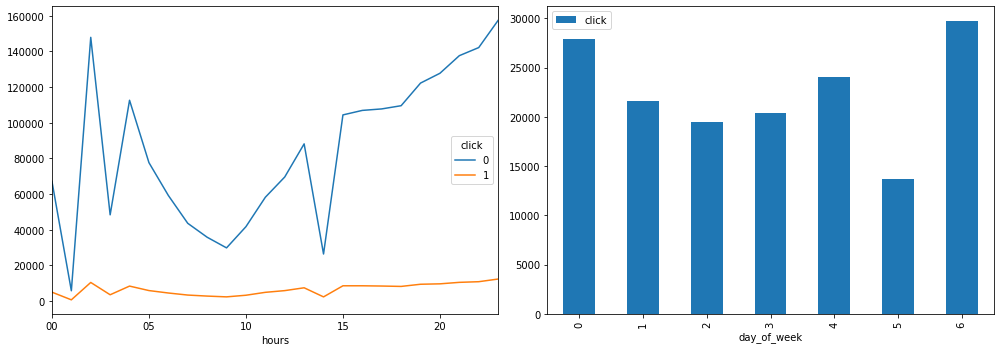

In [25]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pd.crosstab(df["click"], df["hours"]).T.plot(style = [], ax = ax[0])
pd.pivot_table(df, index = ['day_of_week'], values = ['click'],aggfunc= np.sum).plot(kind = 'bar', ax=ax[1]) # 0 - Monday
plt.tight_layout()
plt.show()

In [26]:
df.groupby('click')['click', 'device_height', 'device_width'].mean()


,click,device_height,device_width
click,,,
0,0.0,1112.889173,1190.827225
1,1.0,1192.381731,1082.258899


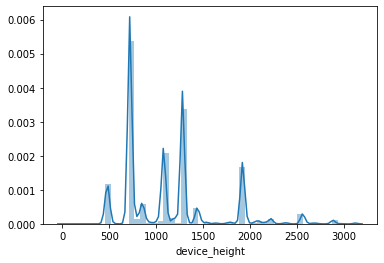

In [27]:
sns.distplot(df['device_height'])

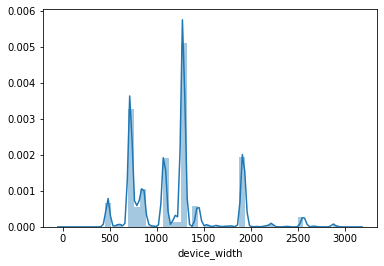

In [28]:
sns.distplot(df['device_width'])

In [29]:
labels_height =[1,2,3,4]
df['height_binning']=pd.qcut(df['device_height'], q=4, labels=labels_height)

In [30]:
label_width =[1,2,3,4]
df['width_binning']=pd.qcut(df['device_width'], q=5,duplicates='drop',labels=label_width)

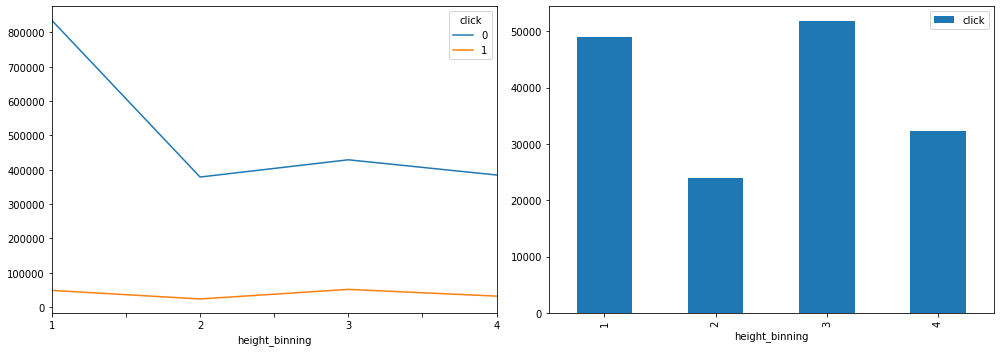

In [31]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pd.crosstab(df["click"], df["height_binning"]).T.plot(style = [], ax = ax[0])
pd.pivot_table(df, index = ['height_binning'], values = ['click'],aggfunc= np.sum).plot(kind = 'bar', ax=ax[1]) # 0 - Monday
plt.tight_layout()
plt.show()

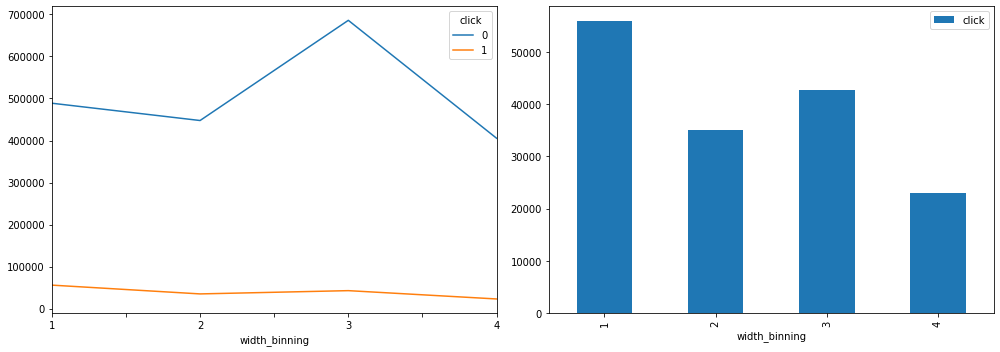

In [32]:
f,ax=plt.subplots(1,2,figsize=(14,5))
pd.crosstab(df["click"], df['width_binning']).T.plot(style = [], ax = ax[0])
pd.pivot_table(df, index = ['width_binning'], values = ['click'],aggfunc= np.sum).plot(kind = 'bar', ax=ax[1]) # 0 - Monday
plt.tight_layout()
plt.show()

In [33]:
df['device_osv'].value_counts()

7.0                            766516
7.1.1                          433010
8.0.0                          366251
6.0.1                          366180
7.1.2                          155856
6.0                             40690
8.1.0                           38759
9                               17452
7.1                                33
8.0                                10
CONTIXO-LA703-20180915-v1.0         7
M                                   5
5.0 by mrkindaiji                   2
unknown                             2
8.0.1                               1
7.0.1                               1
Name: device_osv, dtype: int64

In [34]:
print(pd.crosstab(df['device_osv'], df['click']).sort_values(1,0, ascending = False).head(10))

click                             0      1
device_osv                                
7.0                          707095  59421
7.1.1                        401704  31306
6.0.1                        341086  25094
8.0.0                        345167  21084
7.1.2                        144011  11845
6.0                           36649   4041
8.1.0                         36119   2640
9                             15959   1493
7.1                              29      4
CONTIXO-LA703-20180915-v1.0       6      1


In [35]:
#we'll use only only some columns to build our model
df2=df[['device_osv','day_of_week','month','hours','height_binning','width_binning','click']]

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [37]:
new_df = df.copy()

In [38]:
#Dummy encoding on Month column
new_df = pd.concat([new_df, pd.get_dummies(new_df['month'], prefix='month')], axis=1) 

In [39]:
# Dummy encoding on weekday column
new_df = pd.concat([new_df, pd.get_dummies(new_df['day_of_week'], prefix='day_of_week')], axis=1)

In [40]:
new_df["hours"] = pd.to_numeric(new_df["hours"])

In [41]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2184775 entries, 46 to 3148827
Data columns (total 27 columns):
bidid             object
utc_time          int64
app_id            object
user_state        object
user_isp          object
device_maker      object
device_model      object
device_osv        object
device_height     int64
device_width      int64
marketplace       object
click             int64
day_of_week       object
month             object
hours             int64
height_binning    category
width_binning     category
month_10          uint8
month_11          uint8
month_9           uint8
day_of_week_0     uint8
day_of_week_1     uint8
day_of_week_2     uint8
day_of_week_3     uint8
day_of_week_4     uint8
day_of_week_5     uint8
day_of_week_6     uint8
dtypes: category(2), int64(5), object(10), uint8(10)
memory usage: 291.7+ MB


In [42]:
#new_df['Hour_bins'] = pd.cut(new_df['hours'], bins = [0, 5, 11, 17, 23], 
#                        labels = ['Hour_0-5', 'Hour_6-11', 'Hour_12-17', 'Hour_18-23'], include_lowest= True)

In [43]:
# Creating buckets for hour columns based on EDA part
#new_df['Hour_bins'] = pd.cut(new_df['hours'], bins = [0, 5, 11, 17, 23], 
#                        labels = ['Hour_0-5', 'Hour_6-11', 'Hour_12-17', 'Hour_18-23'], include_lowest= True)

In [44]:
# Dummy encoding on Hour_bins column
#new_df = pd.concat([new_df, pd.get_dummies(new_df['Hour_bins'], prefix='Hour')], axis=1)

In [45]:
# Dummy encoding on Column for state
new_df = pd.concat([new_df, pd.get_dummies(new_df['user_state'], prefix='user_state')], axis=1)

In [46]:
# Dummy encoding on Column for device_osv
new_df = pd.concat([new_df, pd.get_dummies(new_df['device_osv'], prefix='devise_osv')], axis=1)

In [47]:
# Dummy encoding on Column for heigh_binning
new_df = pd.concat([new_df, pd.get_dummies(new_df['height_binning'], prefix='height_binning')], axis=1)

In [48]:
# Dummy encoding on Column for width_binning
new_df = pd.concat([new_df, pd.get_dummies(new_df['width_binning'], prefix='width_binning')], axis=1)

In [49]:
# Dummy encoding on Column for device_maker
new_df = pd.concat([new_df, pd.get_dummies(new_df['device_maker'], prefix='device_maker')], axis=1)

In [50]:
new_df.drop(['hours', 'day_of_week', 'month', 'device_maker', 'device_model', 'user_isp','app_id', 
             'device_height', 'device_height', 'utc_time', 'bidid','user_state','device_osv','marketplace'], axis = 1, inplace = True)

In [51]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2184775 entries, 46 to 3148827
Columns: 354 entries, device_width to device_maker_wor(l)d
dtypes: category(2), int64(2), uint8(350)
memory usage: 783.4 MB


In [52]:
new_df['click'].head()

46    0
47    0
48    1
49    0
50    0
Name: click, dtype: int64

In [53]:
X=new_df.drop(['click'], axis=1)
y=new_df['click']

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [55]:
from sklearn import preprocessing

In [56]:
#X= preprocessing.StandardScaler().fit(X).transform(X)

In [57]:
model= KNeighborsClassifier()

In [ ]:
parameters = {'n_neighbors':np.arange(1,30)}
grid=GridSearchCV(KNeighborsClassifier(),parameters,cv=5)
grid.fit(X_train, y_train)

In [ ]:
grid.best_params_

In [ ]:
best_estimator_knn=grid.best_estimator_

In [ ]:
best_estimator_knn.score(X_test, y_test)

In [ ]:
y_pred_knn=best_estimator_knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))